170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.3209 - loss: 1.8320 - val_accuracy: 0.5320 - val_loss: 1.2903
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.5249 - loss: 1.3227 - val_accuracy: 0.6035 - val_loss: 1.1176
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.5808 - loss: 1.1775 - val_accuracy: 0.6370 - val_loss: 1.0242
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 66ms/step - accuracy: 0.6130 - loss: 1.0964 - val_accuracy: 0.6212 - val_loss: 1.0992
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6344 - loss: 1.0345 - val_accuracy: 0.6899 - val_loss: 0.8965
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.6624 - loss: 0.9633 - val_accuracy: 0.6920 - val_loss: 0.8862
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6726 - loss: 0.9343 - val_accuracy: 0.7024 - val_loss: 0.8622
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 

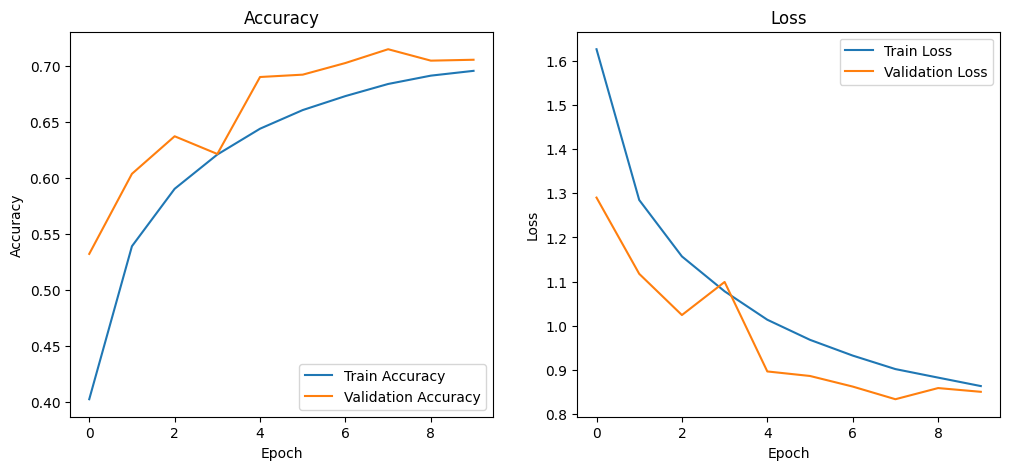

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Class: cat


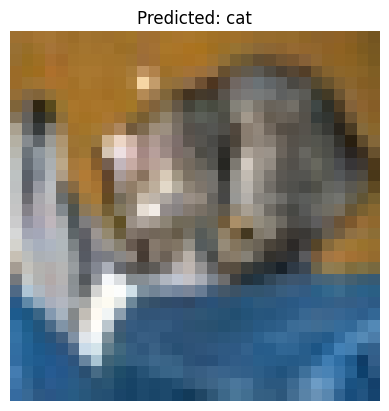

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2

# -----------------------------
# Paths and Config
# -----------------------------
IMG_SIZE = (32, 32)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 10
CLASS_NAMES = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

# -----------------------------
# 1. Load Data
# -----------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

# -----------------------------
# 2. Image Data Generators
# -----------------------------
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()

train_data = train_datagen.flow(
    X_train, y_train, batch_size=BATCH_SIZE, shuffle=True
)

test_data = test_datagen.flow(
    X_test, y_test, batch_size=BATCH_SIZE
)

# -----------------------------
# 3. Build CNN Model
# -----------------------------
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# -----------------------------
# 4. Train the model
# -----------------------------
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

# -----------------------------
# 5. Plot Accuracy and Loss
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

# -----------------------------
# 6. Predict a single image
# -----------------------------
def preprocess_image(img_array, img_size=IMG_SIZE):
    img = cv2.resize(img_array, img_size)
    img = img / 255.0
    return np.expand_dims(img, axis=0)  # batch dimension

test_img = X_test[0]  # select first test image
img_input = preprocess_image(test_img)

pred_probs = model.predict(img_input)
pred_class = CLASS_NAMES[np.argmax(pred_probs)]

print("Predicted Class:", pred_class)
plt.imshow(test_img)
plt.title("Predicted: " + pred_class)
plt.axis('off')
plt.show()

## **Exercise:**

1. Increase More Epochs so that Model can learn more patterns

2. Add Convolutional layers

3. Try adding dropout layers

